<a href="https://colab.research.google.com/github/ttjh1234/Visualization/blob/main/visualizationwithsns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화 도구 Seaborn

Seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전이다.

여기서 사용할 데이터셋은 Seaborn 라이브러리에서 제공하는 'titanic' 데이터셋을 사용한다.

1. 회귀선이 있는 산점도 **regplot**
2. 히스토그램/커널 밀도 그래프 **distplot**
3. 히트맵 **heatmap**
4. 범주형 데이터의 산점도 **stripplot,swarmplot**
5. 막대 그래프 **barplot**
6. 빈도 그래프 **countplot**
7. 박스 플롯/바이올린 그래프 **boxplot/violinplot**
8. 조인트 그래프 **jointplot**
9. 조건을 적용하여 화면을 그리드로 분할하기 **FacetGrid**
10. 이변수 데이터의 분포 **pairplot**



## 데이터 준비 및 환경 구축

먼저 한글 폰트를 설치하고 적용하여 추후의 한글 깨짐을 방지한다.

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
rc('font',family=font_name)
fm._rebuild()
%config InlineBackend.figure_format= 'retina'

NanumGothic


Dataset을 가져오고, 데이터의 기본적인 형태를 파악한다.

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())
print('\n')
print(titanic.info)

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ... 

## 회귀선이 있는 산점도 **regplot**

regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고, 선형 회귀 분석에 의한 회귀선을 함께 나타낸다.

fit_reg를 지정하면 회귀선이 나타난다. (Default : True)

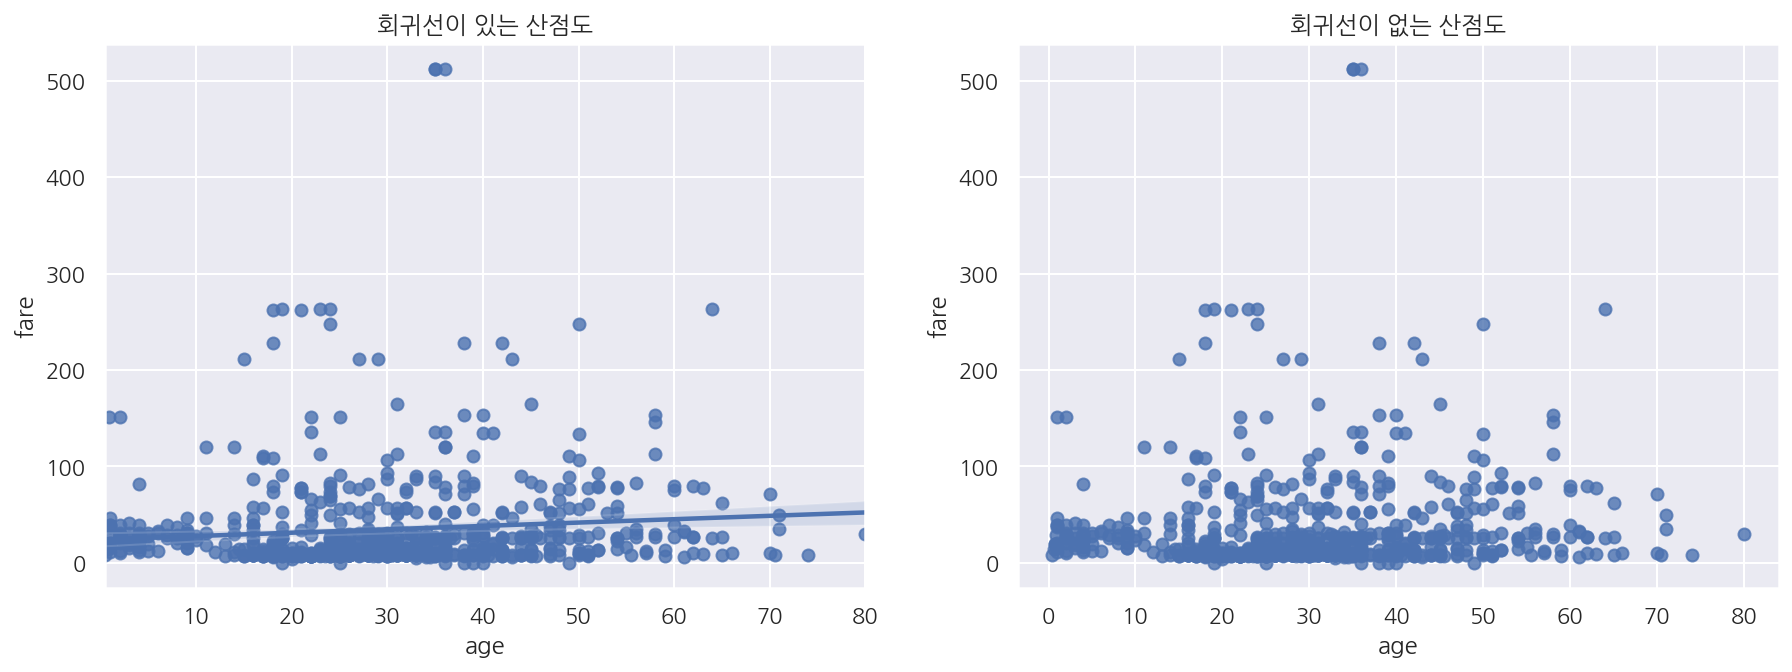

In [ ]:
# 스타일 테마 설정 (5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')
sns.set(font='NanumGothic')
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.regplot(x='age',y='fare',data=titanic,ax=ax1)
sns.regplot(x='age',y='fare',data=titanic,ax=ax2,fit_reg=False)
ax1.set_title('회귀선이 있는 산점도')
ax2.set_title('회귀선이 없는 산점도')
plt.show()

## 히스토그램/커널 밀도 그래프 **distplot**

단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot() 함수를 사용한다.

기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력한다.

* 커널밀도함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수이다.

hist=False 옵션을 추가하면 히스토그램이 표시되지않고, kde=False 옵션을 전달하면 커널 밀도 그래프를 표시하지 않는다.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

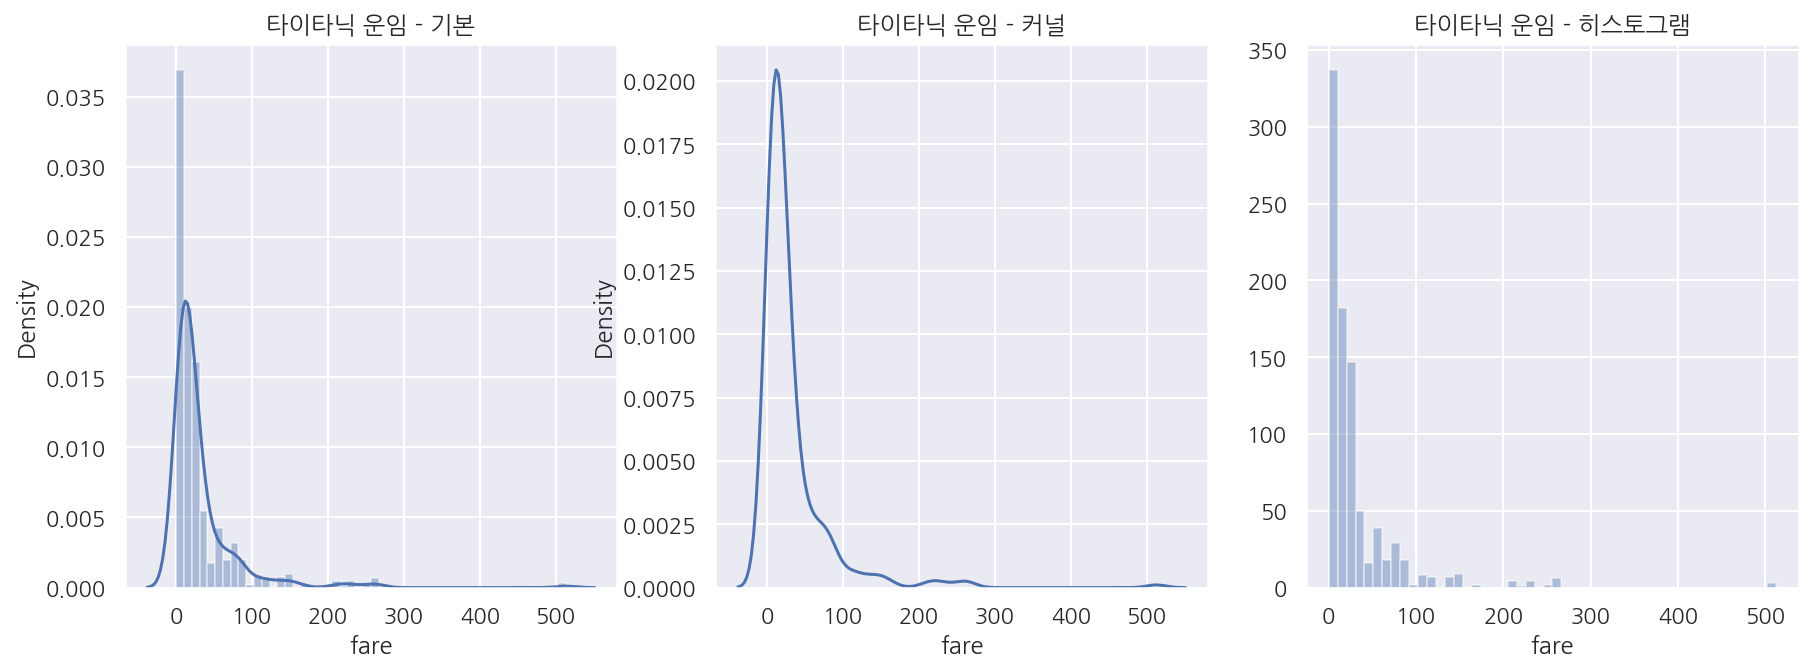

In [ ]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

# 기본 출력
sns.distplot(titanic['fare'],ax=ax1)
# hist=False
sns.distplot(titanic['fare'],hist=False,ax=ax2)
# kde=False
sns.distplot(titanic['fare'],kde=False,ax=ax3)

ax1.set_title('타이타닉 운임 - 기본')
ax2.set_title('타이타닉 운임 - 커널')
ax3.set_title('타이타닉 운임 - 히스토그램')

plt.show()

## 히트맵 **heatmap**

Seaborn 라이브러리는 히트맵을 그리는 heatmap() 메소드를 제공한다.

2개의 범주형 변수를 각각 x,y 축에 놓고 데이터를 매트릭스 형태로 분류한다.

데이터프레임을 피벗테이블로 정리할 때, 한 변수를 행 인덱스로 나머지 변수를 열 이름으로 설정한다. aggfunc='size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻이다.

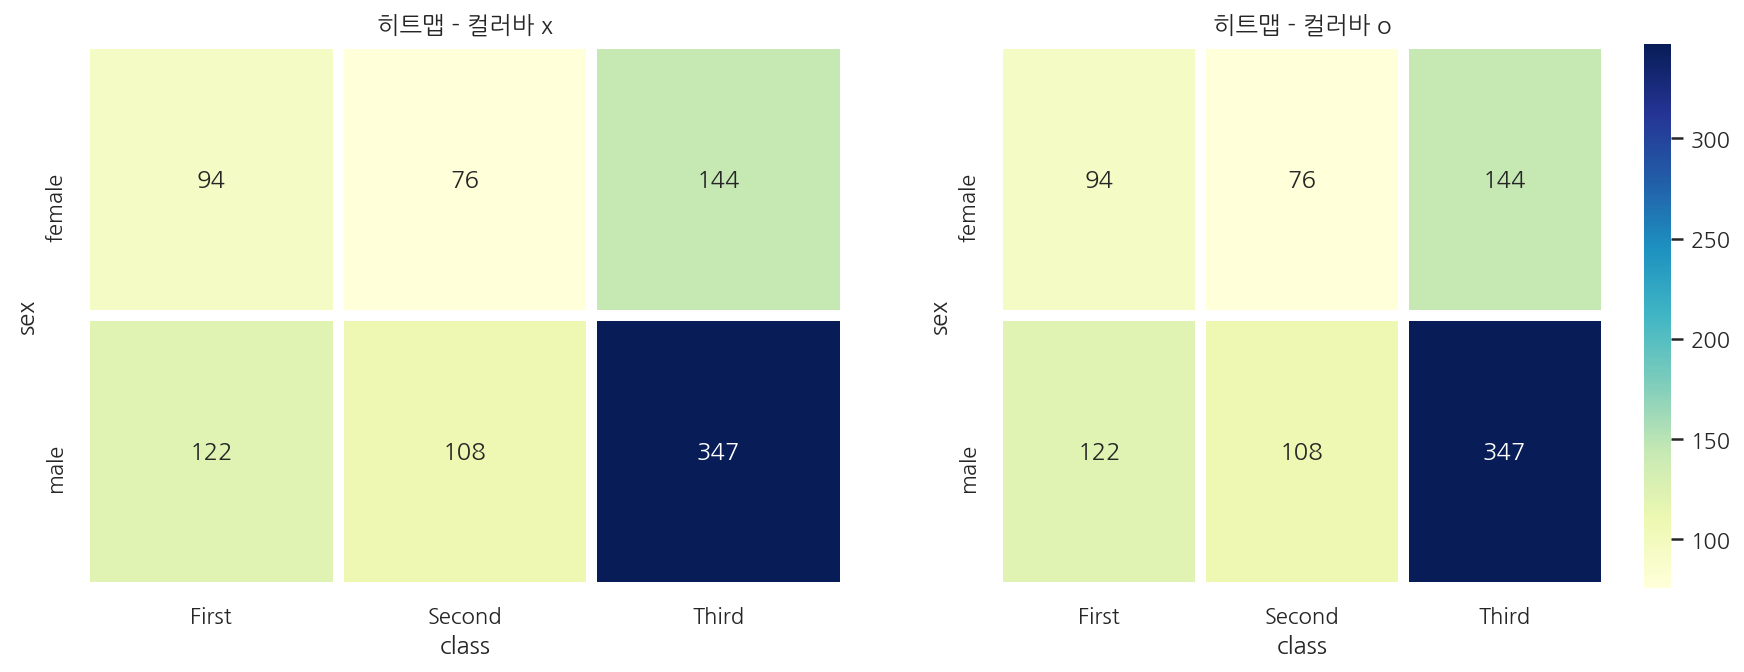

In [ ]:
table=titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
fig,ax=plt.subplots(1,2,figsize=(15,5))


# 컬러바 표시 x
sns.heatmap(table, # 데이터프레임
            annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu', # 컬러맵
            linewidth=5, # 구분 선
            cbar=False, # 컬러바 표시 여부
            ax=ax[0])
# 컬러바 표시 o
sns.heatmap(table, # 데이터프레임
            annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu', # 컬러맵
            linewidth=5, # 구분 선
            cbar=True, # 컬러바 표시 여부
            ax=ax[1])
ax[0].set_title('히트맵 - 컬러바 x')
ax[1].set_title('히트맵 - 컬러바 o')

plt.show()

## 범주형 데이터의 산점도 **stripplot,swarmplot**

범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법이다.

stripplot() 과 swarmplot() 함수가 있다.

swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그린다.

즉, 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있다.

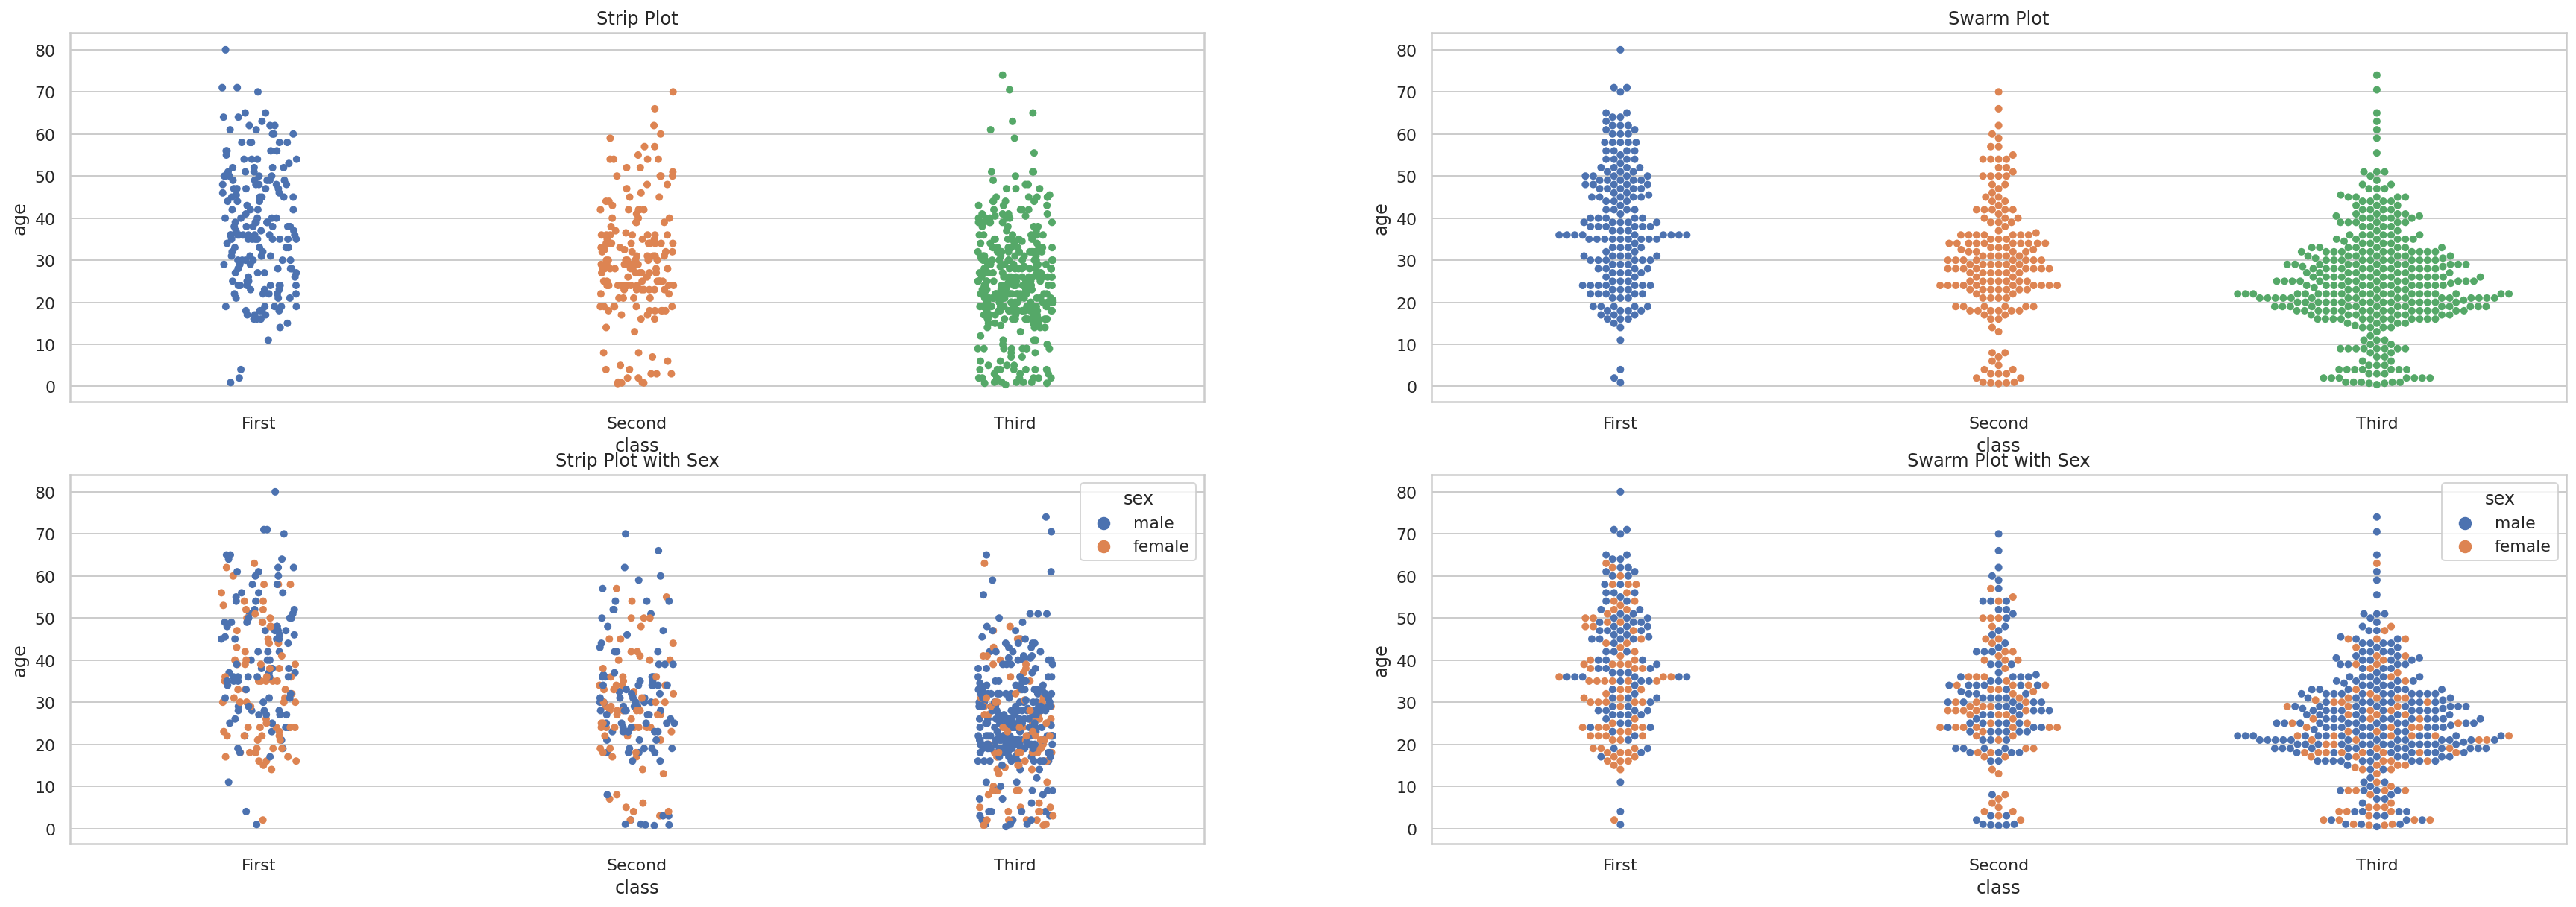

In [ ]:
# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성 
fig, ax=plt.subplots(2,2,figsize=(30,10))
# 이산형 변수의 분포 - 데이터 분산 미고려 (중복 표시 o)
sns.stripplot(x='class', # x축 변수
              y='age', # y축 변수
              data=titanic, # Dataset
              ax=ax[0,0]
              )
# 이산형 변수의 분포 - 데이터 분산 고려 (중복 표시 x)
sns.swarmplot(x='class', # x축 변수
              y='age', # y축 변수
              data=titanic, # Dataset
              ax=ax[0,1]
              )
# 이산형 변수의 분포 - 데이터 분산 미고려 - Hue로 Sex 추가
sns.stripplot(x='class', # x축 변수
              y='age', # y축 변수
              data=titanic, # Dataset
              hue='sex',
              ax=ax[1,0]
              )
# 이산형 변수의 분포 - 데이터 분산 고려 - Hue로 Sex 추가
sns.swarmplot(x='class', # x축 변수
              y='age', # y축 변수
              data=titanic, # Dataset
              hue='sex',
              ax=ax[1,1]
              )
ax[0,0].set_title('Strip Plot')
ax[0,1].set_title('Swarm Plot')
ax[1,0].set_title('Strip Plot with Sex')
ax[1,1].set_title('Swarm Plot with Sex')
plt.show()

## 막대 그래프 **barplot**

막대 그래프를 그리는 방법은 barplot() 메소드를 사용하면 된다.

countplot은 y축을 지정을 안하며, 자연스럽게 y축이 데이터의 갯수를 나타낸다.

barplot은 y축을 지정해야하고 조건은 y축은 숫자이어야 한다.

barplot의 y축은 숫자들의 평균값을 출력하게 된다.

그래프를 그리게 되면 각 그래프 마다 검은색 선이 표시된다.
이 검은선은 신뢰구간의 의미로 각각의 그래프가 검은선 밖으로 넘어서게 되면 데이터의 평균값에 대해서 예외의 케이스가 존재한다는 것을 의미한다. 

검은선 안으로 모두 넘어서지 않는 결과를 나타나는 경우에는 예외의 케이스가 존재 하지 않는다는 것으로 이해하면 된다.

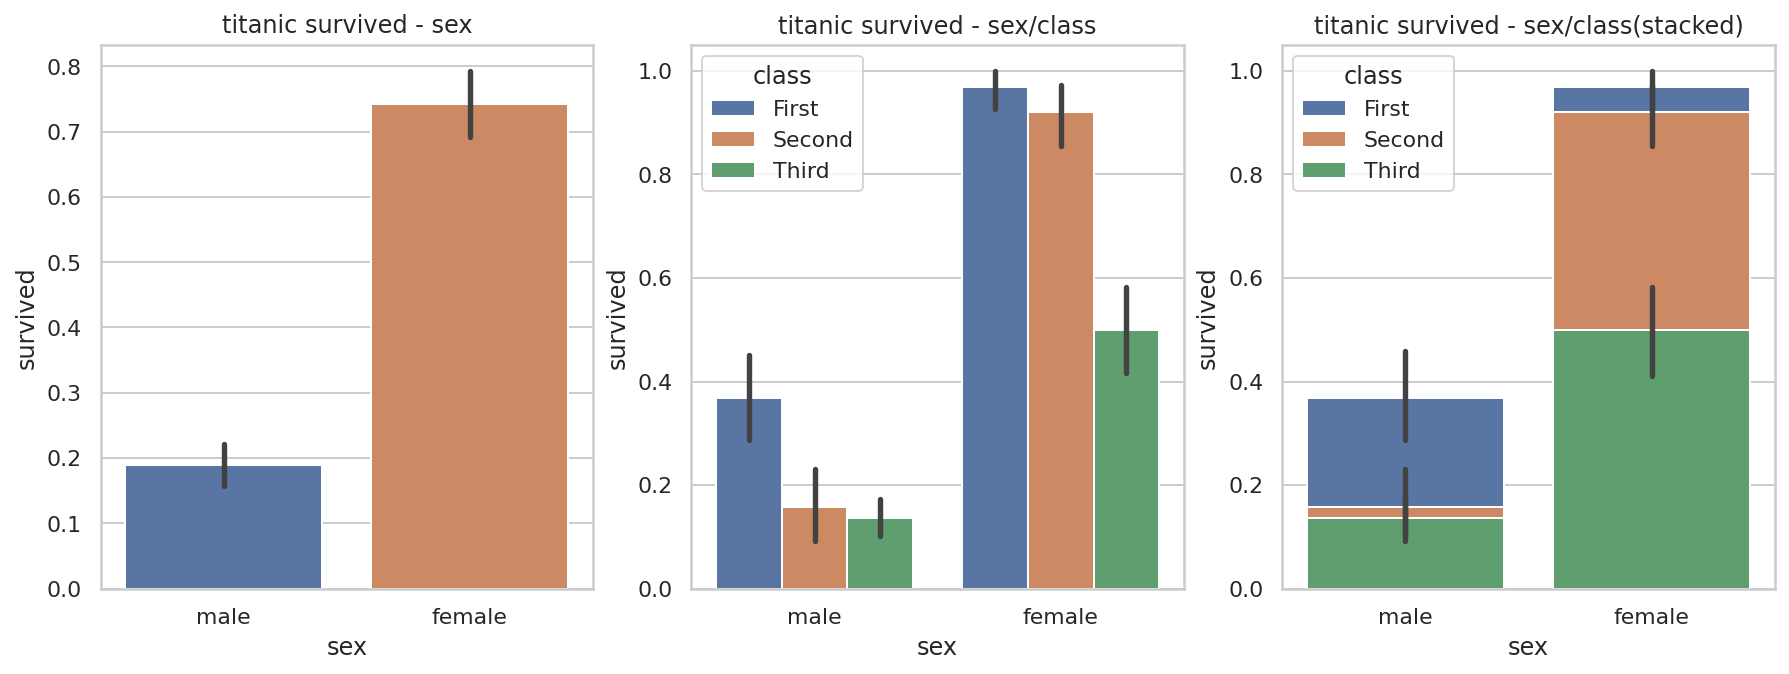

In [ ]:
# 그래프 객체 생성
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# x축, y축에 변수 할당
sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)
# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic,ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

## 빈도 그래프 **countplot**

countplot() 메소드는 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타낼 수 있다.

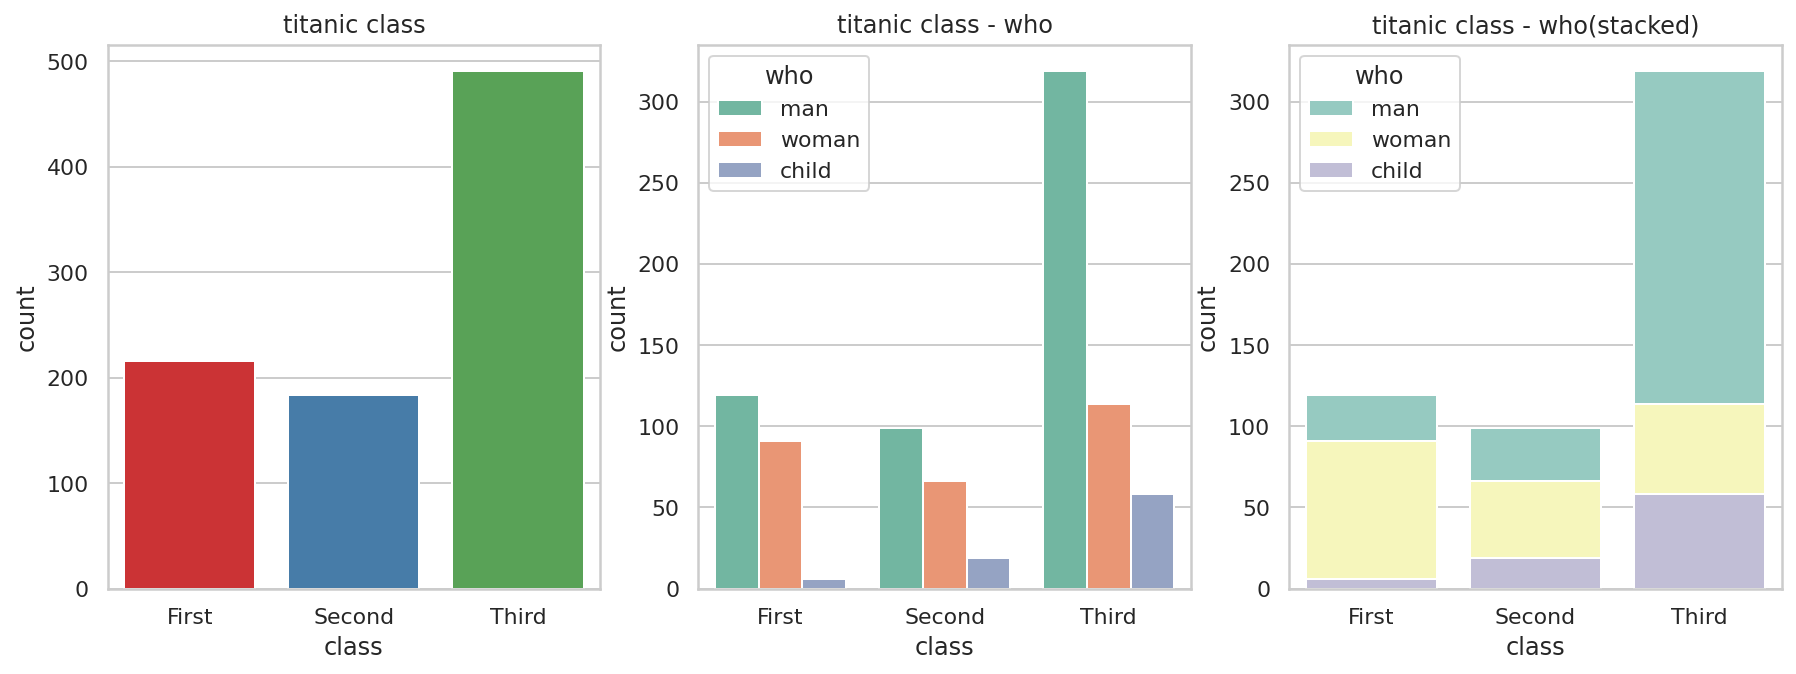

In [ ]:
# 그래프 객체 생성
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)
# hue 옵션에 'who' 추가
sns.countplot(x='class',hue='who',palette='Set2',data=titanic,ax=ax2)
# hue 옵션에 'who' 추가 하고 dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class',hue='who',dodge=False,palette='Set3',data=titanic,ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

## 박스 플롯/바이올린 그래프 **boxplot/violinplot**

박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공한다.

다만, 박스 플롯만으로는 데이터가 퍼져 있는 분산의 정도를 정확하게 알기 어렵기 때문에, 커널 밀도 함수를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있다.

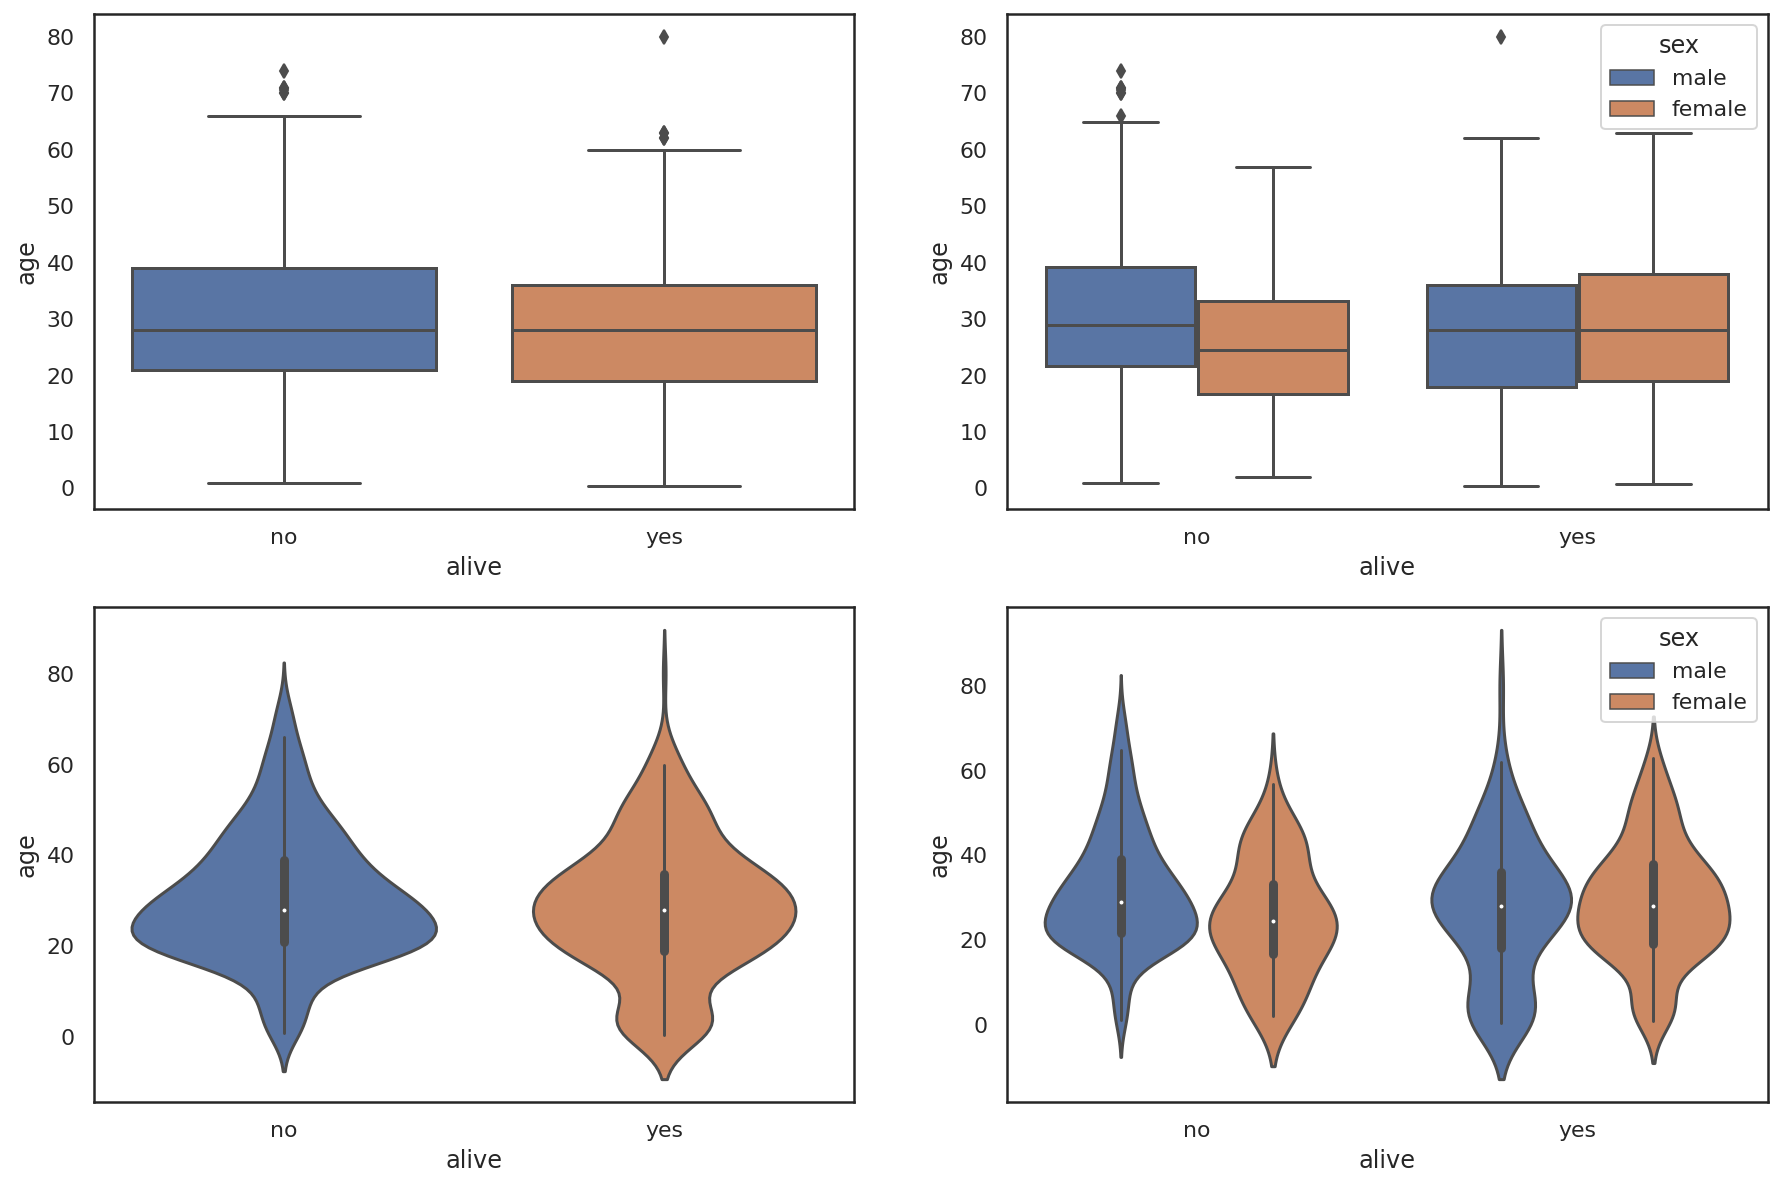

In [ ]:
# 스타일 테마 설정
sns.set_style('white')
# 그래프 객체 생성
fig,ax=plt.subplots(2,2,figsize=(15,10))
# 박스 플롯 - 기본값
sns.boxplot(x='alive',y='age',data=titanic,ax=ax[0,0])
# 박스 플롯 - hue 변수 추가
sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=ax[0,1])
# 바이올린 플롯 - 기본값
sns.violinplot(x='alive',y='age',data=titanic,ax=ax[1,0])
# 바이올린 플롯 - hue 변수 추가
sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax[1,1])

plt.show()

## 조인트 그래프 **jointplot**

jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다.

따라서 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋다.


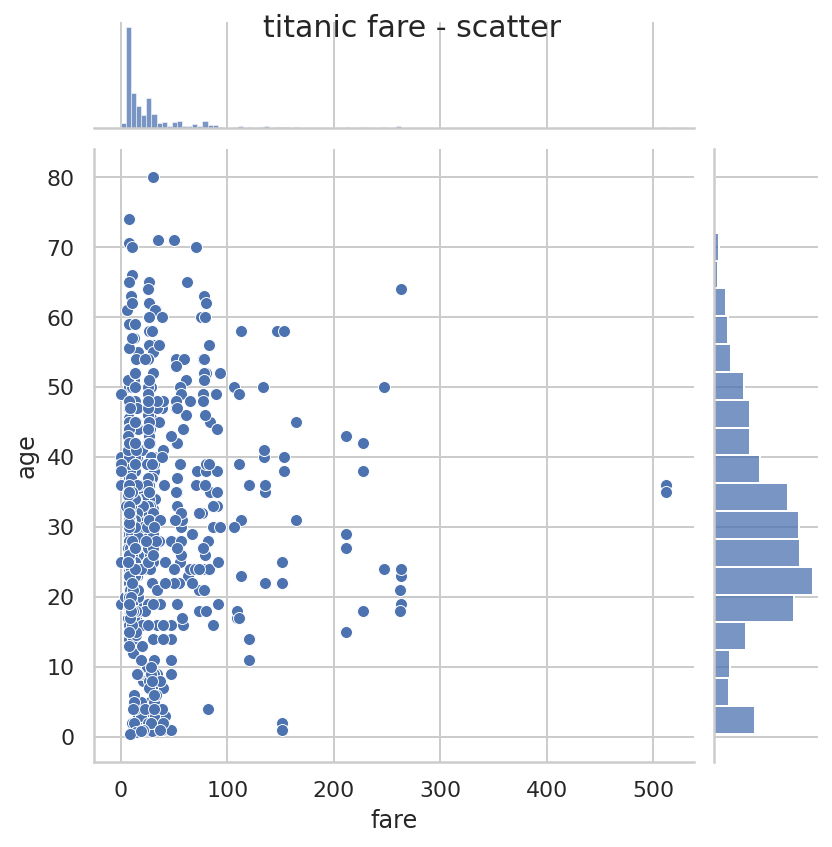

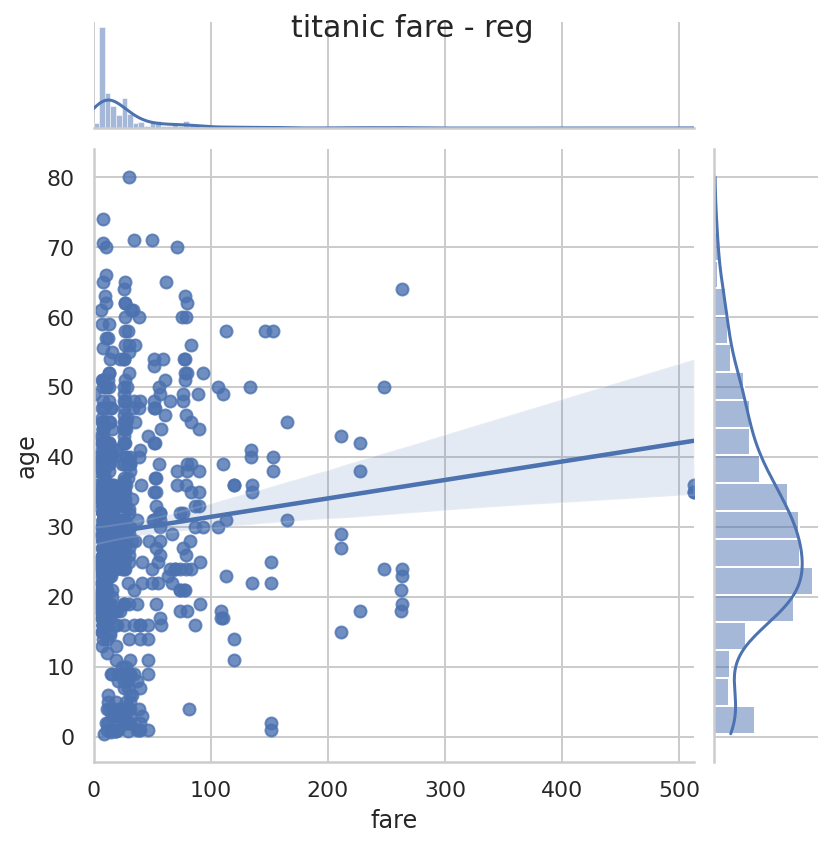

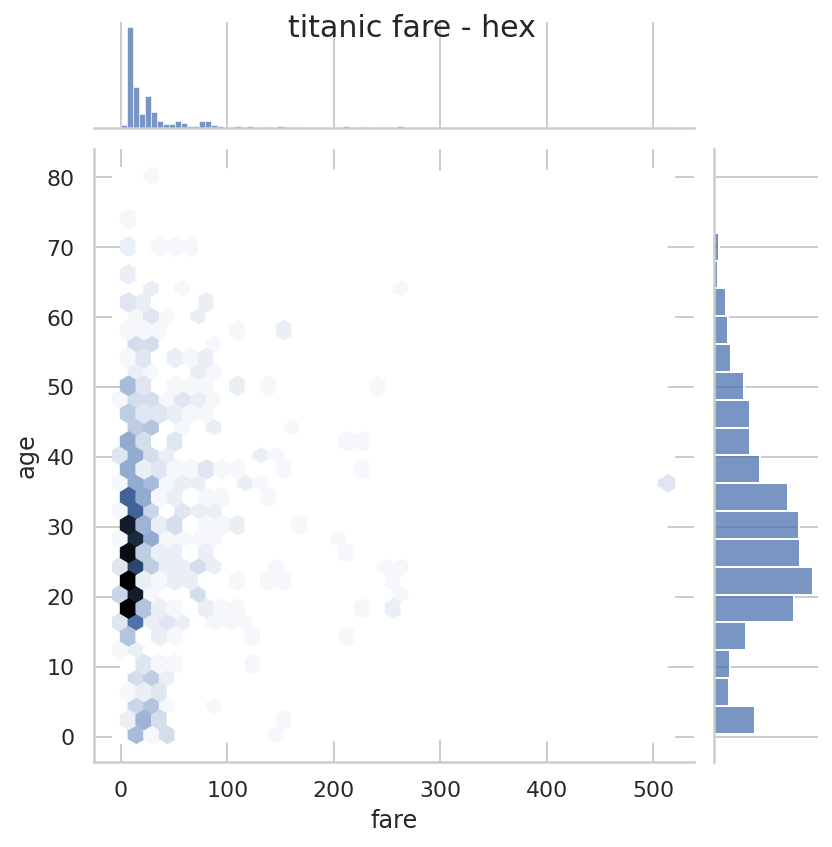

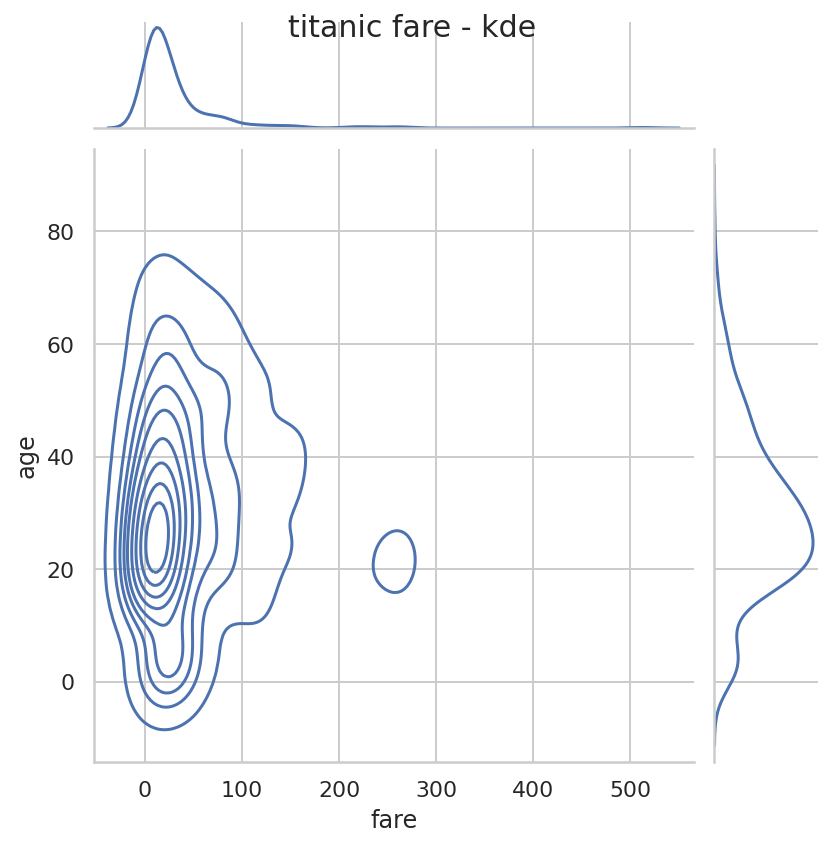

In [ ]:
# 스타일 테마 설정
sns.set_style('whitegrid')
# 조인트 그래프 - 산점도 (기본값)
j1=sns.jointplot(x='fare',y='age',data=titanic)
# 조인트 그래프 - 회귀선
j2=sns.jointplot(x='fare',y='age',kind='reg',data=titanic)
# 조인트 그래프 - 육각 그래프
j3=sns.jointplot(x='fare',y='age',kind='hex',data=titanic)
# 조인트 그래프 - 커널 밀집 그래프
j4=sns.jointplot(x='fare',y='age',kind='kde',data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)

plt.show()

## 조건을 적용하여 화면을 그리드로 분할하기 **FacetGrid**

FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만든다.

그리고 각 서브 플롯에 적용할 그래프 종류를 map() 메소드를 이용하여 그리드 객체에 전달한다.

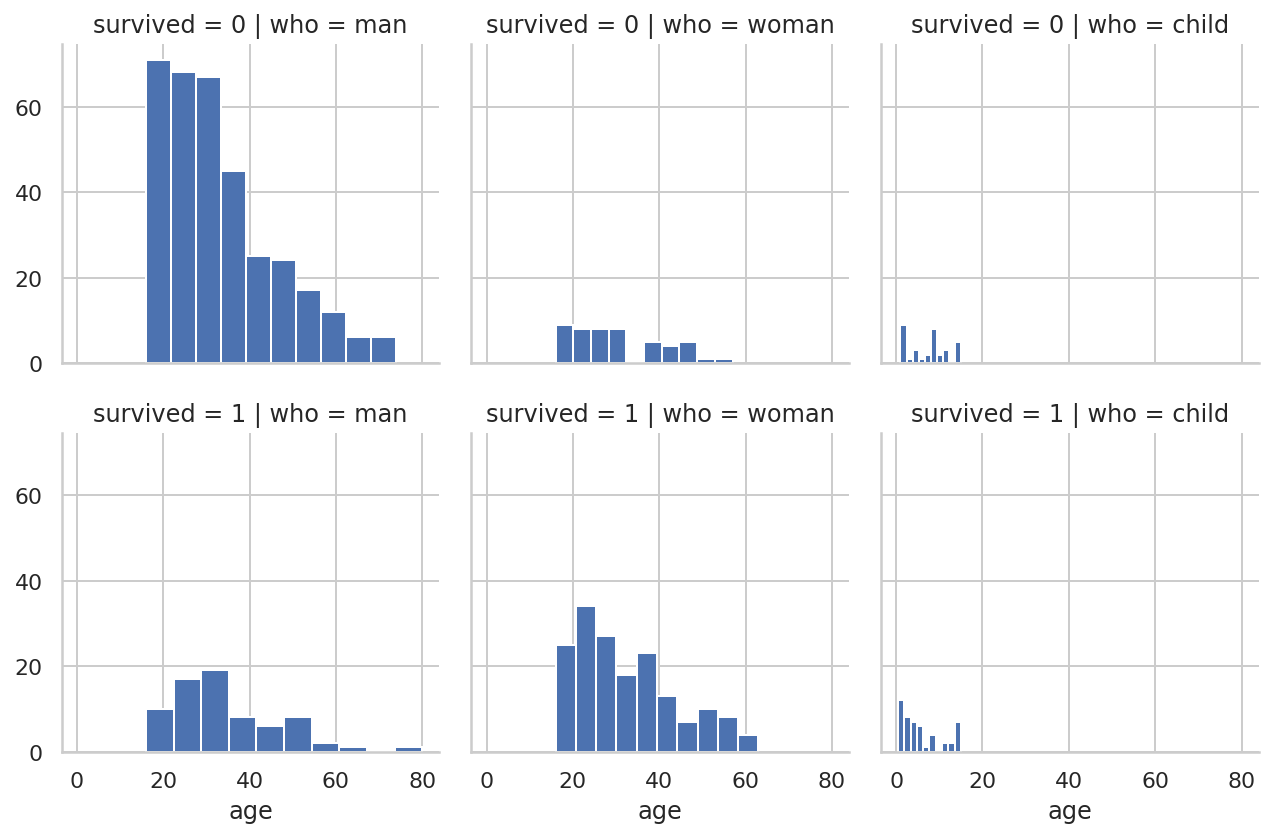

In [ ]:
# 스타일 테마 설정
sns.set_style('whitegrid')
# 조건에 따라 그리드 나누기
g=sns.FacetGrid(data=titanic,col='who',row='survived')
# 그래프 적용하기
g= g.map(plt.hist,'age')
print(g)

## 이변수 데이터의 분포 **pairplot**

pairplot() 함수는 인자로 전달되는 데이터프레임의 열(변수,특성)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다.

그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눈다.

각 그리드에 두 변수 간의 관계를 나타내는 그래프를 하나씩 그린다.

같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그리고, 

서로 다른 변수 간에는 산점도를 그린다.

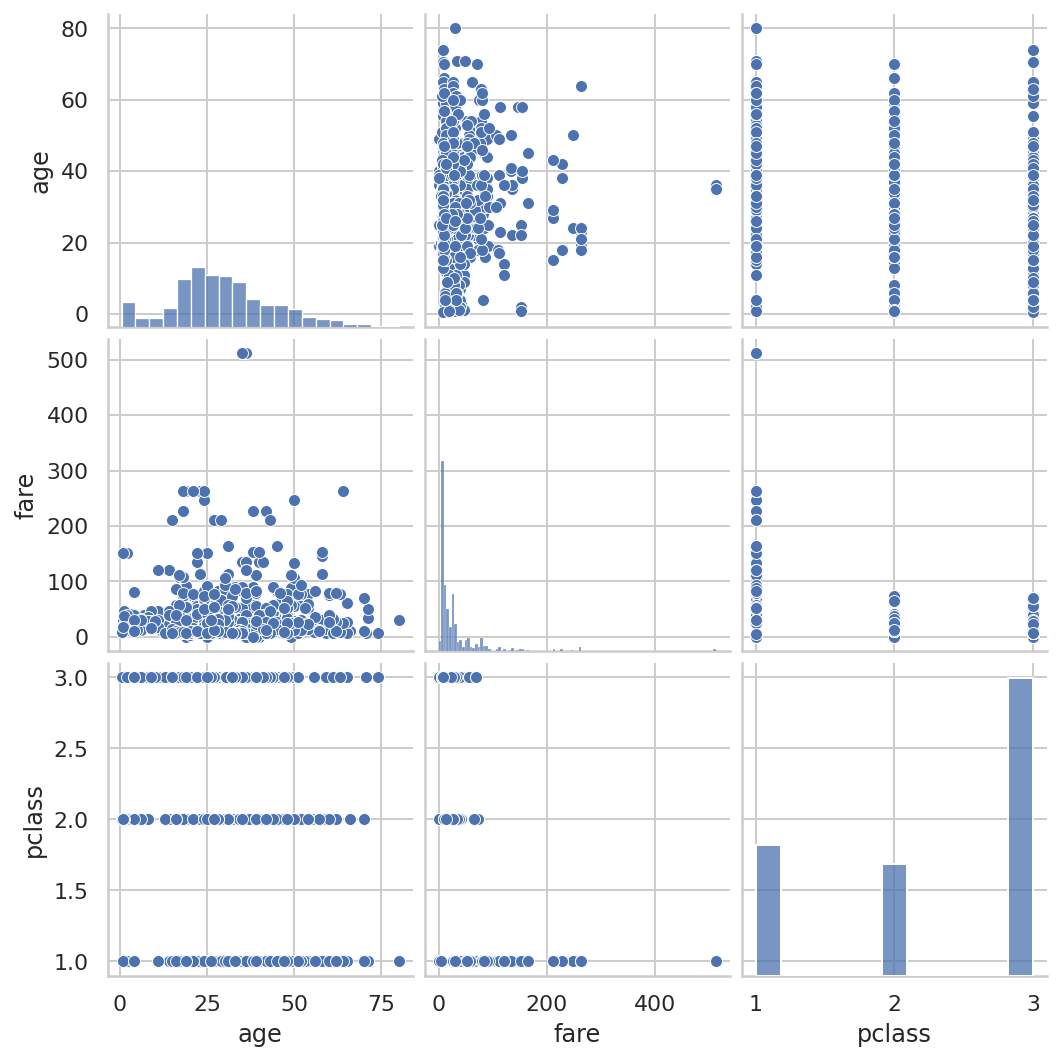

In [ ]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair=titanic[['age','fare','pclass']]

# 조건에 따라 그리드 나누기
p=sns.pairplot(titanic_pair)

plt.show()